In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [5]:
data.shape

(299, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
len_live=len(data['DEATH_EVENT'][data.DEATH_EVENT==0])
len_death=len(data['DEATH_EVENT'][data.DEATH_EVENT==1])

arr=np.array([len_live,len_death])
labels=['LIVING','DEAD']
print("total no of living cases ",len_live)
print("total no of dead cases ",len_death)

plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

total no of living cases  203
total no of dead cases  96


C:\Users\haind\AppData\Local\Temp\ipykernel_5944\3668578308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


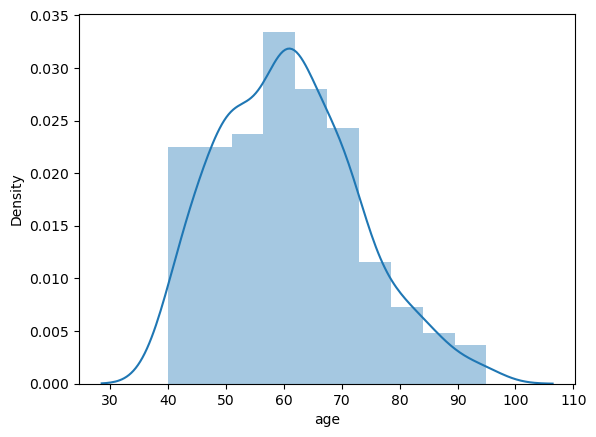

In [13]:
sns.distplot(data['age'])
plt.show()

In [16]:
 ageabive50notdead=(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==0])
ageabove50dead=(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==1])
died=len(ageabove50dead)
notdied=len(ageabive50notdead)

arr=np.array([died,notdied])
labels=['died','not died']


plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

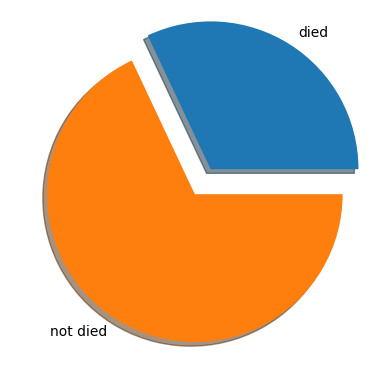

In [19]:
notdiabetis0=(data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==0])
diabetis1=(data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==1])
notdied=len(notdiabetis0)
died=len(diabetis1)

arr=np.array([died,notdied])
labels=['died','not died']


plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

<Axes: >

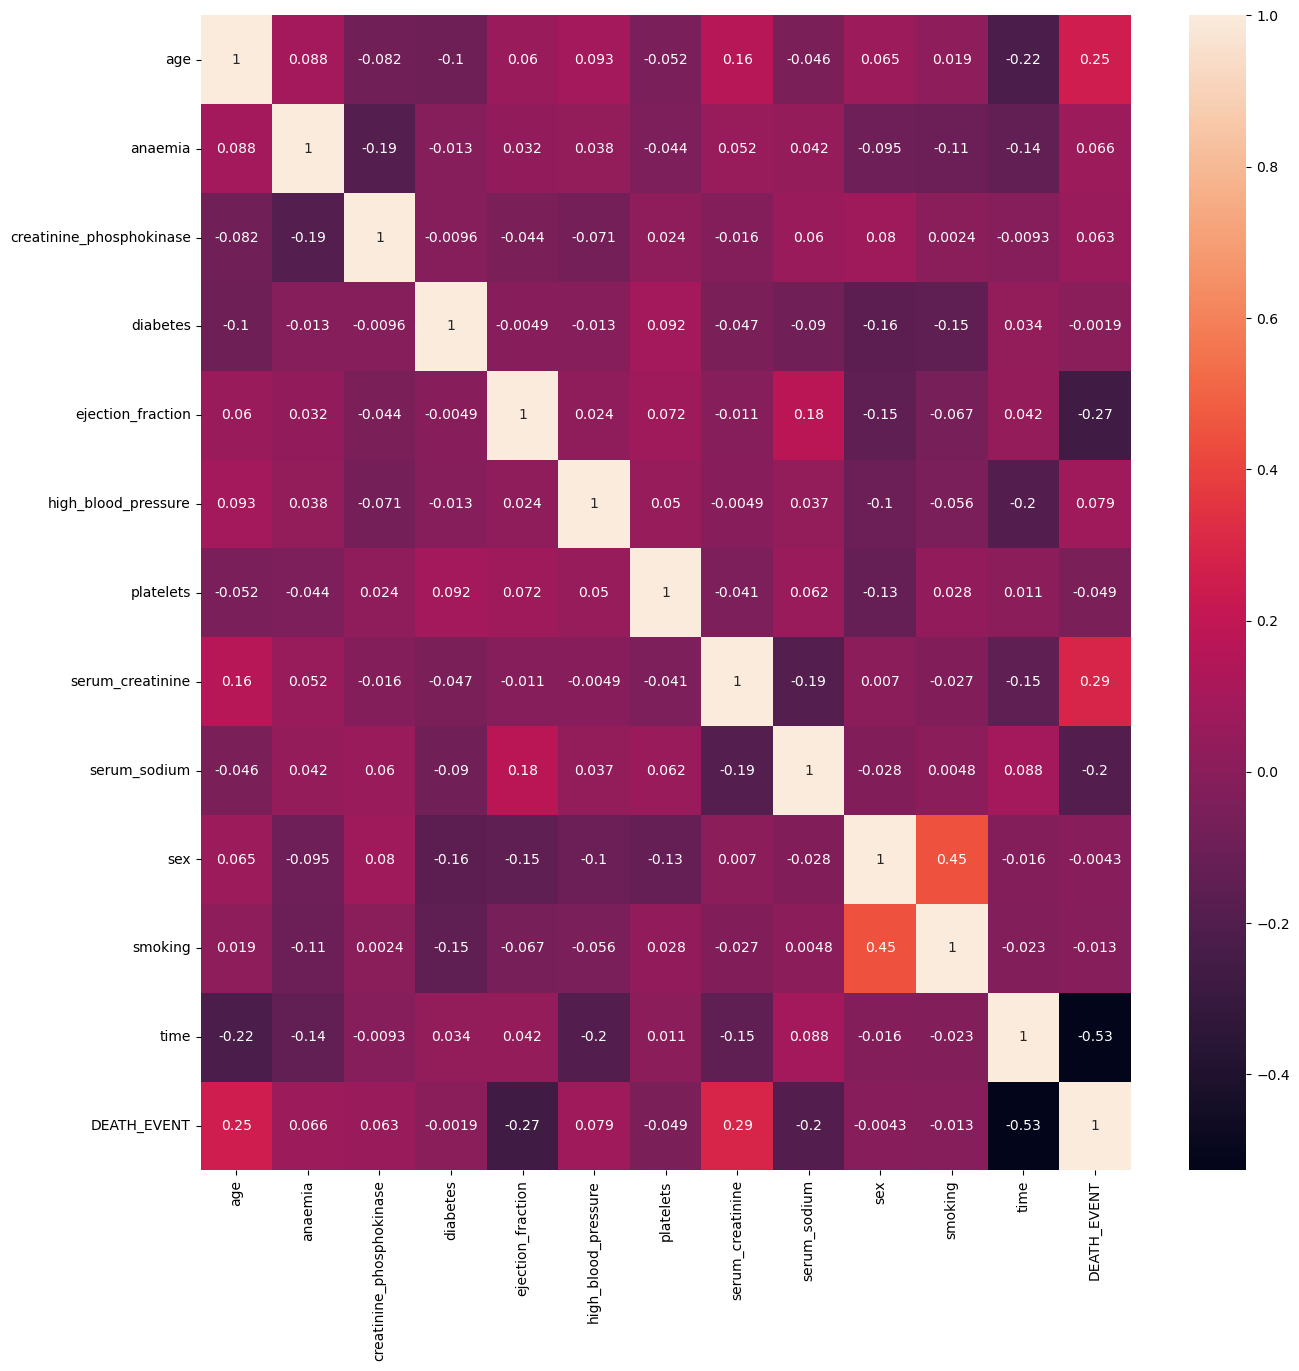

In [21]:
corr=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [22]:
data.corr().style.background_gradient(cmap='coolwarm')

In [24]:
from sklearn.model_selection import train_test_split
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((209, 12), (90, 12), (209,), (90,))

In [27]:
def add_int(x):
    f=x.columns
    m=len(f)
    xint=x.copy(deep=True)
    for i in range(m):
        feature_iname=f[i]
        feature_idata=x[feature_iname]
        for j in range(i+1,m):
            feature_jname=f[j]
            feature_jdata=x[feature_jname]
            feature_ijname=feature_iname+'_x_'+feature_jname
            xint[feature_ijname]=feature_idata*feature_jdata
    return xint
xtrainmod=add_int(xtrain)
xtestmod=add_int(xtest)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [31]:
def evaluating_model(ytest,ypred):
    print("confusion matrix=",confusion_matrix(ytest,ypred))
    print("accuracy score=",accuracy_score(ytest,ypred))
    print("precision_score=",precision_score(ytest,ypred))
    print("recall_score=",recall_score(ytest,ypred))
    

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(xtrain,ytrain)
lr_pred=lr.predict(xtest)

In [40]:
ypred=lr.predict(xtest)
evaluating_model(ytest,ypred)

confusion matrix= [[58  4]
 [14 14]]
accuracy score= 0.8
precision_score= 0.7777777777777778
recall_score= 0.5


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lr_pip=make_pipeline(StandardScaler(),LogisticRegression())
lr_pip.fit(xtrain,ytrain)
ypred2=lr_pip.predict(xtest)
evaluating_model(ytest,ypred1)


confusion matrix= [[58  4]
 [13 15]]
accuracy score= 0.8111111111111111
precision_score= 0.7894736842105263
recall_score= 0.5357142857142857


In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(xtrain,ytrain)
grid.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=10, gamma=0.0001)

In [52]:
ypred2=lr_pip.predict(xtest)

In [53]:
evaluating_model(ytest,ypred2)

confusion matrix= [[58  4]
 [13 15]]
accuracy score= 0.8111111111111111
precision_score= 0.7894736842105263
recall_score= 0.5357142857142857


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params,runs=20,clf=DecisionTreeClassifier(random_state=2)):
    rand=RandomizedSearchCV(clf,params,n_iter=runs,cv=5,n_jobs=-1,random_state=2)
    rand.fit(xtrain,ytrain)
    bestmodel=rand.best_estimator_
    bestscore=rand.best_score_
    print("training score=",bestscore)
    ypred3=bestmodel.predict(xtest)
    accuracy=accuracy_score(ytest,ypred3)
    print("test score=",accuracy)
    return bestmodel

randomized_search(params={'criterion':['entropy','gini'],
                          'splitter':['random','best'],
                          'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                          'min_samples_split':[2,3,4,5,6,8,10],
                          'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
                          'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.1,0.15,0.2],
                          'max_leaf_nodes':[10,15,20,25,30,25,40,45,50,None],
                          'max_features':['auto',0.95,0.9,0.85,0.8,0.75,0.7],
                          'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05]
                         })
                          
    

training score= 0.8421602787456445
test score= 0.8555555555555555


DecisionTreeClassifier(criterion='entropy', max_features=0.95,
                       max_leaf_nodes=15, min_impurity_decrease=0.05,
                       min_samples_leaf=0.03, min_samples_split=3,
                       min_weight_fraction_leaf=0.0025, random_state=2)

In [63]:

ds_clf=DecisionTreeClassifier(max_depth=8,max_features=0.9,max_leaf_nodes=30,
                              min_impurity_decrease=0.05,min_samples_leaf=0.02,
                              min_samples_split=10,min_weight_fraction_leaf=0.005,
                              random_state=2,splitter='random')
ds_clf.fit(xtrain,ytrain)
ypred4=ds_clf.predict(xtest)
evaluating_model(ytest,ypred4)

confusion matrix= [[55  7]
 [10 18]]
accuracy score= 0.8111111111111111
precision_score= 0.72
recall_score= 0.6428571428571429


In [66]:
from sklearn.ensemble import RandomForestClassifier
randomized_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0,0.01,0.05,0.1,0.15,0.2],
                          'max_features':['auto',0.8,0.7,0.6,0.5,0.4],        
                           'max_depth':[None,2,4,6,8,10,20]
                         },clf=DecisionTreeClassifier(random_state=2))
                     
                          
                    

training score= 0.8421602787456445
test score= 0.8555555555555555


C:\Users\haind\anaconda31\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\haind\anaconda31\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\haind\anaconda31\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\haind\anaconda31\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\haind\anaconda31\Lib\site-pac

DecisionTreeClassifier(max_depth=10, max_features=0.6,
                       min_impurity_decrease=0.1, random_state=2)

In [68]:
rf=RandomForestClassifier(max_depth=2,max_features=0.5,min_impurity_decrease=0.01,min_samples_leaf=10,random_state=2)
rf.fit(xtrain,ytrain)
ypred5=rf.predict(xtest)
evaluating_model(ytest,ypred5)

confusion matrix= [[60  2]
 [10 18]]
accuracy score= 0.8666666666666667
precision_score= 0.9
recall_score= 0.6428571428571429


In [72]:
!pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)


In [77]:
!pip install --upgrade xgboost

In [80]:
from xgboost import XGBClassifier, DMatrix, train

# Assuming xtrain, xtest, ytrain, ytest are defined
dtrain = DMatrix(xtrain, label=ytrain)
dtest = DMatrix(xtest, label=ytest)

# Define parameters
params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 4,
    'subsample': 1.0,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the model using `train` function with early stopping
eval_list = [(dtest, 'eval'), (dtrain, 'train')]
bst = train(params, dtrain, num_boost_round=400, evals=eval_list, 
            early_stopping_rounds=10, verbose_eval=True)


[0]	eval-logloss:0.57444	train-logloss:0.58243
[1]	eval-logloss:0.53675	train-logloss:0.54278
[2]	eval-logloss:0.50777	train-logloss:0.50968
[3]	eval-logloss:0.48659	train-logloss:0.47639
[4]	eval-logloss:0.46540	train-logloss:0.44921
[5]	eval-logloss:0.45034	train-logloss:0.42418
[6]	eval-logloss:0.43492	train-logloss:0.40343
[7]	eval-logloss:0.42562	train-logloss:0.38172
[8]	eval-logloss:0.41523	train-logloss:0.36346
[9]	eval-logloss:0.40096	train-logloss:0.34804
[10]	eval-logloss:0.39540	train-logloss:0.33191
[11]	eval-logloss:0.38980	train-logloss:0.31713
[12]	eval-logloss:0.38287	train-logloss:0.30591
[13]	eval-logloss:0.37953	train-logloss:0.29358
[14]	eval-logloss:0.37523	train-logloss:0.28256
[15]	eval-logloss:0.37315	train-logloss:0.27274
[16]	eval-logloss:0.37093	train-logloss:0.26280
[17]	eval-logloss:0.36779	train-logloss:0.25471
[18]	eval-logloss:0.36587	train-logloss:0.24481
[19]	eval-logloss:0.36552	train-logloss:0.23749
[20]	eval-logloss:0.36157	train-logloss:0.22969
[2

In [84]:
from xgboost import DMatrix

# Convert xtest to DMatrix
dtest = DMatrix(xtest)

# Make predictions
pred6 = bst.predict(dtest)


In [85]:
# Convert probabilities to binary predictions
pred6 = (pred6 > 0.5).astype(int)  # Apply a threshold to convert probabilities to 0 or 1

# Now evaluate the model
evaluating_model(ytest, pred6)

confusion matrix= [[56  6]
 [ 8 20]]
accuracy score= 0.8444444444444444
precision_score= 0.7692307692307693
recall_score= 0.7142857142857143


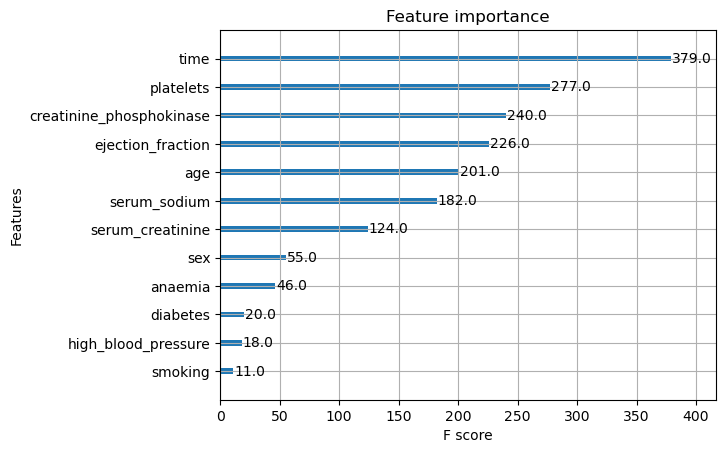

In [86]:
from xgboost import plot_importance
plot_importance(bst)
plt.show()

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=1,random_state=0)
gb.fit(xtrain,ytrain)
predgb=gb.predict(xtest)
evaluating_model(ytest,predgb)

confusion matrix= [[59  3]
 [10 18]]
accuracy score= 0.8555555555555555
precision_score= 0.8571428571428571
recall_score= 0.6428571428571429


In [89]:
import joblib
joblib.dump(gb,'model.pkl')
m=joblib.load('model.pkl')
m.predict(xtest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)